In [1]:
# data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import math
import random

# visualisation data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import RootMeanSquaredError
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
import joblib
from tensorflow.keras import regularizers

# remove warnings for plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# for upload file
import os

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
users_dataset = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Dataset/Users_Dataset.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
users_dataset

,User_ID,Place_ID,Rating_x,Name,Image,URL,Rating_y,Num_Rating,Category,Address,Longitude,Latitude
0,4,406,4,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.co.id/maps/place/Mr.K+Cafe+...,4.5,6257,Kafe,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
1,6,406,3,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.co.id/maps/place/Mr.K+Cafe+...,4.5,6257,Kafe,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
2,10,406,2,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.co.id/maps/place/Mr.K+Cafe+...,4.5,6257,Kafe,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
3,12,406,3,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.co.id/maps/place/Mr.K+Cafe+...,4.5,6257,Kafe,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
4,12,406,3,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.co.id/maps/place/Mr.K+Cafe+...,4.5,6257,Kafe,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
...,...,...,...,...,...,...,...,...,...,...,...,...
822816,16999,405,5,Jual Souvenir Semarang - Progift,https://lh5.googleusercontent.com/p/AF1QipOday...,https://www.google.com/maps/place/Jual+Souveni...,5.0,95,Toko Suvenir,"Jalan Selo Mas Timur IX no 437, Tugu, Kota Sem...",110.401493,-6.959994
822817,17093,405,1,Jual Souvenir Semarang - Progift,https://lh5.googleusercontent.com/p/AF1QipOday...,https://www.google.com/maps/place/Jual+Souveni...,5.0,95,Toko Suvenir,"Jalan Selo Mas Timur IX no 437, Tugu, Kota Sem...",110.401493,-6.959994
822818,17242,405,1,Jual Souvenir Semarang - Progift,https://lh5.googleusercontent.com/p/AF1QipOday...,https://www.google.com/maps/place/Jual+Souveni...,5.0,95,Toko Suvenir,"Jalan Selo Mas Timur IX no 437, Tugu, Kota Sem...",110.401493,-6.959994
822819,17407,405,2,Jual Souvenir Semarang - Progift,https://lh5.googleusercontent.com/p/AF1QipOday...,https://www.google.com/maps/place/Jual+Souveni...,5.0,95,Toko Suvenir,"Jalan Selo Mas Timur IX no 437, Tugu, Kota Sem...",110.401493,-6.959994


In [4]:
# Encode categorical variables
user_encoder = LabelEncoder()
place_encoder = LabelEncoder()

In [5]:
users_dataset['user_encoded'] = user_encoder.fit_transform(users_dataset['User_ID'])
users_dataset['place_encoded'] = place_encoder.fit_transform(users_dataset['Place_ID'])

In [7]:
train_df, test_df = train_test_split(users_dataset, test_size=0.2, random_state=42)

In [8]:
# Define input layers
user_input = Input(shape=(1,))
place_input = Input(shape=(1,))

# Flatten the inputs
user_flatten = Flatten()(user_input)
place_flatten = Flatten()(place_input)

# Concatenate the inputs
concatenated = Concatenate()([user_flatten, place_flatten])

# Define hidden layers with regularization
hidden1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
hidden2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(hidden1)

# Output layer
output = Dense(1)(hidden2)

In [9]:
model = Model(inputs=[user_input, place_input], outputs=output)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [10]:
X_train = [train_df['user_encoded'], train_df['place_encoded']]
y_train = train_df['Rating_x']
# Prepare the test data
X_test = [test_df['user_encoded'], test_df['place_encoded']]
y_test = test_df['Rating_x']

# Train the model with validation data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512)

Epoch 1/30
1286/1286 [==============================] - 7s 3ms/step - loss: 994.1785 - accuracy: 0.1801 - val_loss: 3.5860 - val_accuracy: 0.1967
Epoch 2/30
1286/1286 [==============================] - 4s 3ms/step - loss: 4.2383 - accuracy: 0.1973 - val_loss: 28.3733 - val_accuracy: 0.1974
Epoch 3/30
1286/1286 [==============================] - 5s 4ms/step - loss: 78.4225 - accuracy: 0.1602 - val_loss: 40.4093 - val_accuracy: 0.0277
Epoch 4/30
1286/1286 [==============================] - 4s 3ms/step - loss: 77.2212 - accuracy: 0.1556 - val_loss: 80.2650 - val_accuracy: 0.0236
Epoch 5/30
1286/1286 [==============================] - 4s 3ms/step - loss: 65.5202 - accuracy: 0.1646 - val_loss: 11.8387 - val_accuracy: 0.1974
Epoch 6/30
1286/1286 [==============================] - 4s 3ms/step - loss: 63.7284 - accuracy: 0.1735 - val_loss: 5.6904 - val_accuracy: 0.1974
Epoch 7/30
1286/1286 [==============================] - 5s 4ms/step - loss: 59.2550 - accuracy: 0.1665 - val_loss: 47.4187 - v

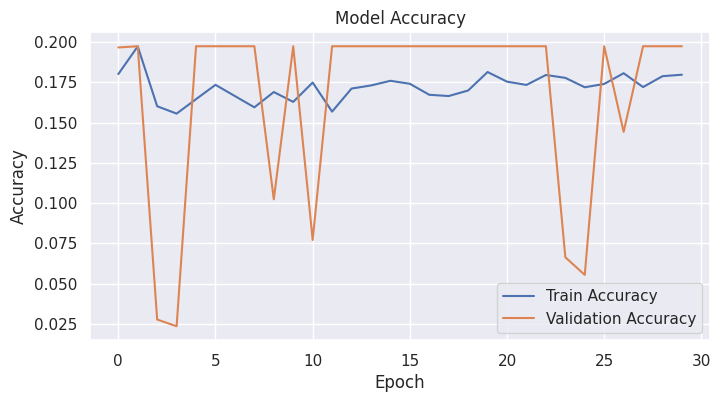

In [11]:
# take accuracy and validation from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

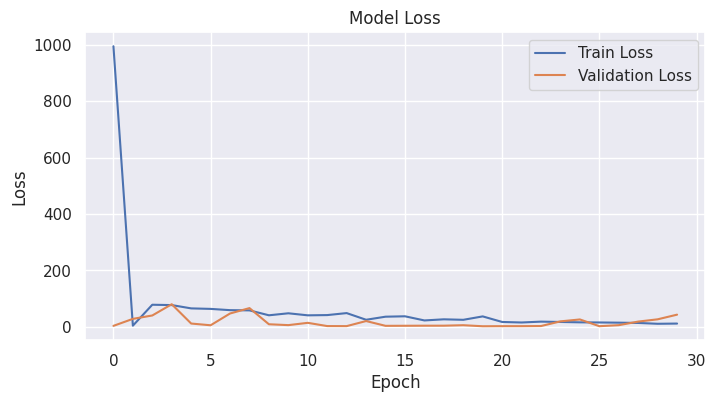

In [12]:
# loss plot
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
def calculate_distance(location1, location2):
    lat1, lon1 = location1
    lat2, lon2 = location2
    # Calculate the distance using the Haversine formula
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius is approximately 6371 km

    return distance

In [15]:
def get_recommendations():
    # Get the JSON data from the request
    user_latitude = -6.898647901908838
    user_longitude = 110.40228767871858
    user_location = (user_latitude, user_longitude)

    # Get all unique places
    unique_places = users_dataset['Place_ID'].unique()

    # Encode the categorical variables
    user_encoder = LabelEncoder()
    place_encoder = LabelEncoder()
    users_dataset['user_encoded'] = user_encoder.fit_transform(users_dataset['User_ID'])
    users_dataset['place_encoded'] = place_encoder.fit_transform(users_dataset['Place_ID'])

    # Generate a random user ID
    user_id = random.choice(users_dataset['User_ID'].unique())

    # Get recommendations for the specific user
    user_id_encoded = user_encoder.transform([user_id])[0]
    user_input = np.full(len(unique_places), user_id_encoded)
    place_input = np.arange(len(unique_places))

    # Predict ratings for the user and sort them in descending order
    predictions = model.predict([user_input, place_input]).flatten()
    sorted_indices = np.argsort(predictions)[::-1]

    # Get the top 5 recommendations
    top_5_collaborative_places = unique_places[sorted_indices[:5]]

    # Get the recommended places' details
    collaborative_recommendations = users_dataset[users_dataset['Place_ID'].isin(top_5_collaborative_places)][
        ['Place_ID', 'Name', 'Rating_y', 'Num_Rating', 'Latitude', 'Longitude',
         'Category', 'Address', 'Image', 'URL']]. \
        sort_values('Rating_y', ascending=False)

    # Calculate and add the distance for each recommended place
    collaborative_recommendations['distance'] = collaborative_recommendations.apply(
        lambda row: calculate_distance(user_location, (row['Latitude'], row['Longitude'])), axis=1)
    collaborative_recommendations['distance'] = collaborative_recommendations['distance'].apply(lambda d: f"{round(d, 2)} km")

    # Filter out any duplicate places
    collaborative_recommendations = collaborative_recommendations.drop_duplicates(subset=['Name'])

    # Create a list of recommended place dictionaries
    collaborative_recommended = []
    for _, row in collaborative_recommendations.iterrows():
        distance_str = row['distance'].split(' ')[0]
        distance = float(distance_str)
        place = {
            'place_id': row['Place_ID'],  # Add the place ID to the result
            'name': row['Name'],
            'rating': row['Rating_y'],
            'num_ratings': row['Num_Rating'],
            'category': row['Category'],
            'address': row['Address'],
            'image': row['Image'],
            'url': row['URL'],
            'distance': f"{round(distance, 2)} km"
        }
        collaborative_recommended.append(place)
    # Return the list of recommended places
    return collaborative_recommended

In [16]:
recommended_places = get_recommendations()

for place in recommended_places:
    print("Place ID:", place['place_id'])
    print("Name:", place['name'])
    print("Rating:", place['rating'])
    print("Num_Rating:", place['num_ratings'])
    print("Category:", place['category'])
    print("Address:", place['address'])
    print("Distance:", place['distance'])
    print("Image:", place['image'])
    print("URL:", place['url'])
    print()

18/18 [==============================] - 0s 1ms/step
Place ID: 405
Name: Jual Souvenir Semarang - Progift
Rating: 5.0
Num_Rating: 95
Category: Toko Suvenir
Address: Jalan Selo Mas Timur IX no 437, Tugu, Kota Semarang
Distance: 6.82 km
Image: https://lh5.googleusercontent.com/p/AF1QipOdayen4nD7cfTzT4t1OlHQQCcWCl1p2BrLVYme=w92-h92-k-no
URL: https://www.google.com/maps/place/Jual+Souvenir+Semarang+-+Progift/data=!4m7!3m6!1s0x2e708b6cf74cf005:0x4758f799490d8cd0!8m2!3d-6.9599944!4d110.4040678!16s%2Fg%2F11gzrwb7ys!19sChIJBfBM92yLcC4R0IwNSZn3WEc?authuser=0&hl=id&rclk=1

Place ID: 402
Name: Toko Souvenir : Kraskress_craft
Rating: 5.0
Num_Rating: 1
Category: Toko Suvenir
Address: 283F+QWW, Jl. Bukit Beringin Tim. IV, Tugu, Kota Semarang
Distance: 13.93 km
Image: https://streetviewpixels-pa.googleapis.com/v1/thumbnail?panoid=W2oMupw_Wk7yMmPCfbwiVA&cb_client=search.gws-prod.gps&w=80&h=92&yaw=313.138&pitch=0&thumbfov=100
URL: https://www.google.com/maps/place/Toko+Souvenir+:+Kraskress_craft/data=!

In [17]:
model.save('collaborative_model.h5')

In [18]:
# Save the model using joblib
joblib.dump(model, 'collaborative_model.pkl')

['collaborative_model.pkl']

In [19]:
# Save the model using joblib
joblib.dump(model, 'collaborative_model.joblib')

['collaborative_model.joblib']

In [21]:
import tensorflow as tf

# Load the H5 model
model = tf.keras.models.load_model('collaborative_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('collaborative_model.tflite', 'wb') as f:
    f.write(tflite_model)